# T1 - Programacao Concorrente


# Objetivo
Implementar em C no Linux o programa CONTROLADOR, o qual deve incluir as seguintes funcionalidades de controle:

- Laço de controle como tarefa periódica para a temperatura;
- Uso do tanque auxiliar e da saída de água;
- Informações na tela sobre a situação corrente.

Outros requisitos:
- Não usar threads;
- Período do controlador de temperatura deve ser 30ms exato, ver exemplo;
- Atualização da tela pode ser aproximadamente a cada 1 segundo.

Adicionalmente:

- Número de amostras >= 10000.
- Usar como unidade microsegundo nos gráficos.
- Fazer a coleta dos dados em máquina real e não em máquina virtual.
- Gerar relatório em PDF com texto descrevendo as observações e os gráficos.

In [55]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [51]:
NANOSEC_PER_MICRO = 1000
temperature_response_times = pd.read_csv('temperature.csv', header=None)
temperature_response_times.columns = ['response_times_ns']
display(temperature_response_times)

height_response_times = pd.read_csv('height.csv', header=None)
height_response_times.columns = ['response_times_ns']
display(height_response_times)

alarm_response_times = pd.read_csv('alarm.csv', header=None)
alarm_response_times.columns = ['response_times_ns']
alarm_response_times

,response_times_ns
0,13686254
1,880071
2,1043784
3,1041723
4,3820930
...,...
11430,1540230
11431,2039644
11432,1663689
11433,1743563


,response_times_ns
0,7947998
1,2968736
2,3161942
3,3299830
4,3433465
...,...
8329,1494169
8330,569487
8331,2430160
8332,3126668


,response_times_ns
0,155981
1,2157493
2,99282
3,62346
4,61047
...,...
59350,480305
59351,67024
59352,1224265
59353,69039


In [52]:
def plot_resposnse_time(response_times, name):
    rtmis = response_times.response_times_ns / NANOSEC_PER_MICRO

    sns_plot = plt.figure(figsize=(15, 10))
    sns.histplot(rtmis)
    plt.title(f'Distribuição dos tempos de resposta para a(o) {name}')
    plt.ylabel('Contagem')
    plt.xlabel('Tempo de resposta [μs]')
    # sns_plot.savefig("response_time_distribution.png")
    plt.show()

    print(f'Numero de amostras: {response_times.shape[0]}')
    print(f'Media: {rtmis.mean()} μs')
    print(f'Mediana: {rtmis.median()} μs')
    print(f'Desvio padrao: {rtmis.std()} μs')
    print(f'Max: {rtmis.max()} μs')
    print(f'Min: {rtmis.min()} μs')

Grupo: David Steiner Sand - 17100655


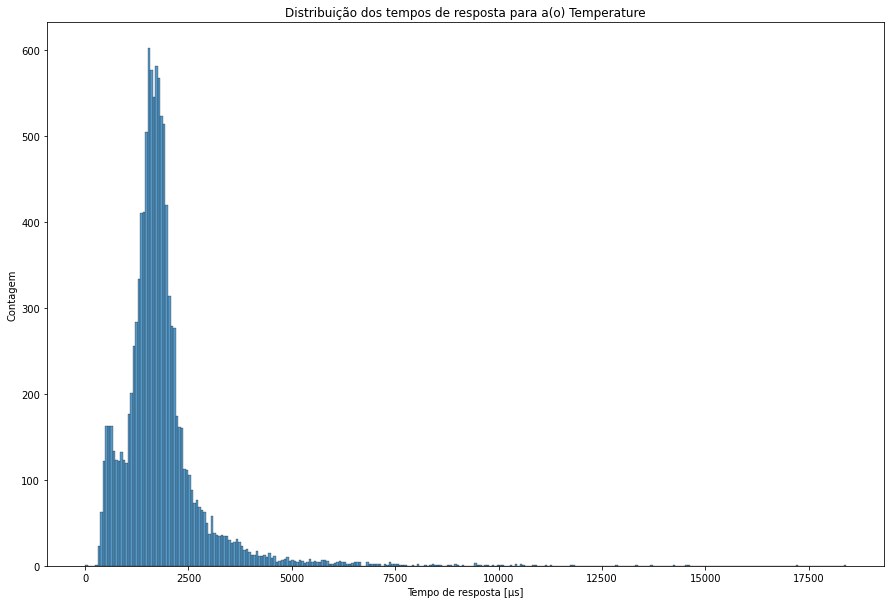

Numero de amostras: 11435
Media: 1843.6560842151289 μs
Mediana: 1697.827 μs
Desvio padrao: 1053.5956219113914 μs
Max: 18402.301 μs
Min: 0.019 μs


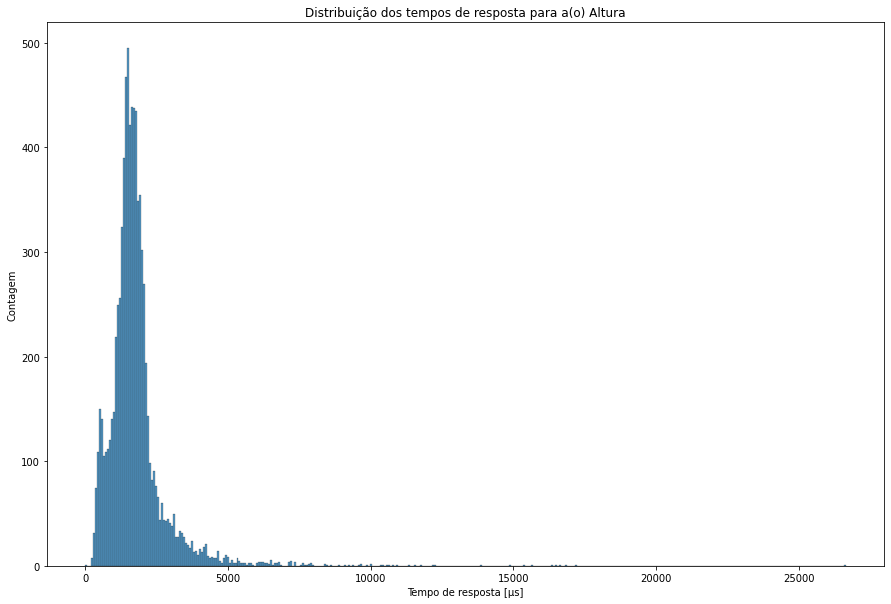

Numero de amostras: 8334
Media: 1791.9636025917928 μs
Mediana: 1621.8905 μs
Desvio padrao: 1153.0716686940493 μs
Max: 26648.831 μs
Min: 0.021 μs


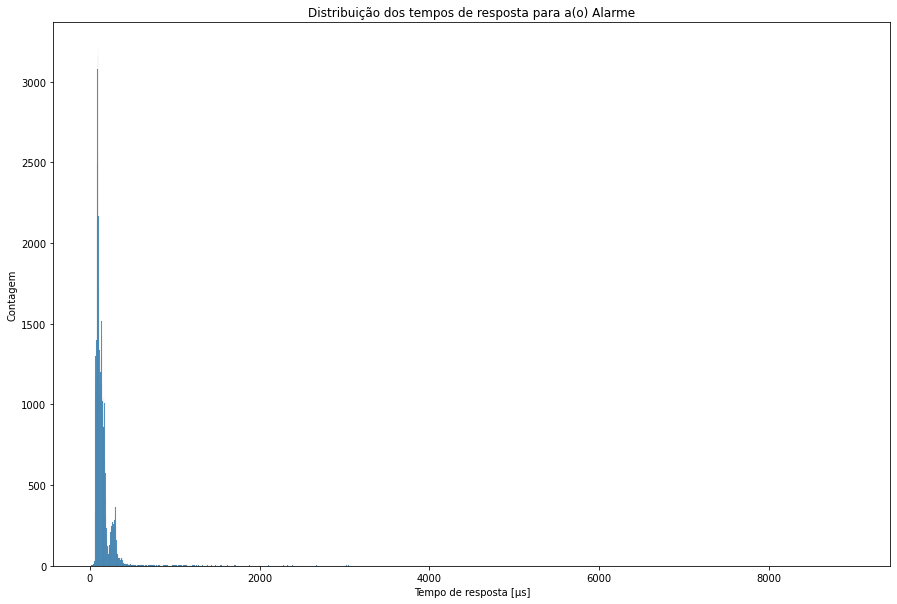

Numero de amostras: 59355
Media: 152.59050277145985 μs
Mediana: 115.117 μs
Desvio padrao: 205.85046942255192 μs
Max: 8988.437 μs
Min: 18.489 μs

Codigo fonte: https://github.com/davidssand/concurrent-programming


In [54]:
print('Grupo: David Steiner Sand - 17100655')
plot_resposnse_time(temperature_response_times, 'Temperature')
plot_resposnse_time(height_response_times, 'Altura')
plot_resposnse_time(alarm_response_times, 'Alarme')
print(f'\nCodigo fonte: https://github.com/davidssand/concurrent-programming')